# Lesson 2 Challenge
Dataset: Kaggle World Happiness Report
Dataset URL: https://www.kaggle.com/unsdsn/world-happiness

**Variables**
* Data on country and region level
* Happiness Score: Metric measured in 2015 by asking the sampled people the question: "How would you rate your happiness on a scale of 0 to 10 where 10 is the happiest."


* Economy (GDP per Capita): The extent to which GDP contributes to the calculation of the Happiness Score.
* Family: The extent to which Family contributes to the calculation of the Happiness Score.
* Health (Life Expectancy): The extent to which Life expectancy contributed to the calculation of the Happiness Score.
* Freedom: The extent to which Freedom contributed to the calculation of the Happiness Score.
* Trust: The extent to which Perception of Corruption contributes to Happiness Score.
* Generosity: The extent to which Generosity contributed to the calculation of the Happiness Score.
* Dystopia: The extent to which Dystopia contributed to the calculation of the Happiness Score.

Each visualization should be accompanied by 2-3 sentences describing what you think is revealed by this representation. 
* Generate at least four different visuals
* Use different types as well as the subplot functionality
* Tell a coherent story.

In [3]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
import numpy as np

In [4]:
# Import Datasets
df2016 = pd.DataFrame(pd.read_csv('thinkful_datasets/happiness_data_2016.csv'))
df2016['year'] = '2016'

# Clean 2016 Column Names
df2016.columns = df2016.columns.str.strip().str.lower().str.replace(' ', '_').str.replace(
    '(', "").str.replace(')', '')
df2016.rename(columns={
 'happiness_score':"happiness",
 'economy_gdp_per_capita':'gdp',
 'health_life_expectancy':'life_expectancy',
 'trust_government_corruption': 'trust',
 'dystopia_residual': 'dystopia'}, inplace=True)
# Select Columns we would like to look at
column_names = df2016.columns
column_edit = column_names[3:4].append(column_names[6:-2])

# 1. Boxplot
Boxplots are useful to compare the spread and skew of datasets that may be of different sizes. 
In the boxplots below we see that 'GDP per Capita' is the variable with the greatest spread of values for the countries in this study and seems to have the greatest impact on happiness on average. However, since there is such a big spread for some countries we should expect to find some other variable to have a greater impact on hapiness. 

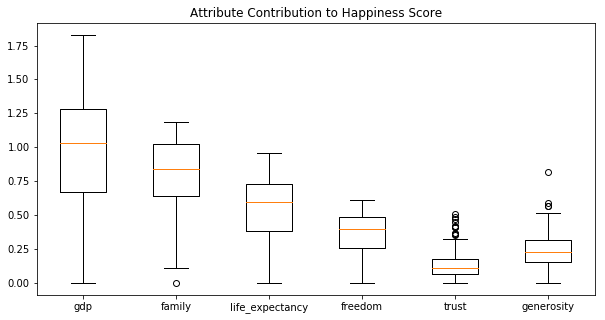

In [23]:
fig = plt.figure(1, figsize=[10,5])

ax = fig.add_subplot(111)
boxplot_data = []

for column in column_edit[1:]:
    boxplot_data.append(df2016[column])

ax.boxplot(boxplot_data)    
ax.set_xticklabels(column_edit[1:])
plt.title('Attribute Contribution to Happiness Score')
plt.show()

# 2. Histogram

From the histograms below we see that for most countries gdp per capita has a strong impact on happiness though there are a few countires popping up bewtten 0.0-0.5 where that does not seem to be the case. Generosity and trust in institutions have a lesser impact on happiness.

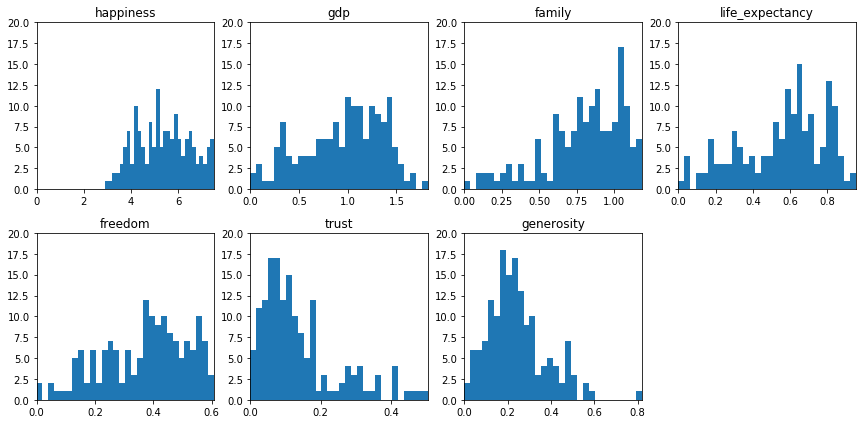

In [31]:
#column_names = df2016.columns
plt.figure(figsize=(12,6))
n = 0
for column_name in column_edit:
    #print(column_name)
    n=n+1
    plt.subplot(2,4,n)
    plt.hist(df2016[column_name], bins=30)
    plt.xlim(0,max(df2016[column_name]))
    plt.ylim(0,20)
    plt.title(column_name)

plt.tight_layout()
plt.show()


# 3. Overlapping Histograms
Though these traits sound like they would go along together, 'Personal Freedom' and 'Trust in Goverment' have opposing distributions representing their impact on happiness. Freedom tends to have a higher impact on Happiness but has a greater variance in its impact than trust. 

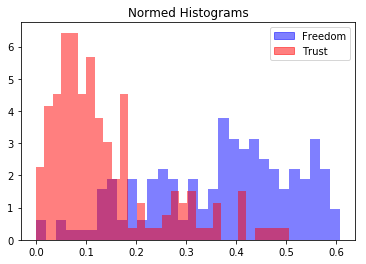

In [5]:
plt.hist(df2016['freedom'], density=True, bins=30, color='blue', alpha=0.5, label='freedom')
plt.hist(df2016['trust'], density=True, bins=30, color='red', alpha=0.5, label= 'trust')    

plt.title('Normed Histograms')
#plt.xlim(0,1)

plt.legend(handles=[mpatches.Patch(color='blue', alpha=.5, label='Freedom'), 
            mpatches.Patch(color='red', alpha=.5, label='Trust')]) 
plt.show()

# 4. Scatterplot
Looking further into the relationship of Freedom & Trust's impact on happiness in the scatterplot below we see that the countries with greatest happiness had high rating of freedom and trust. These Highly happy countries are represented by yellow dots.

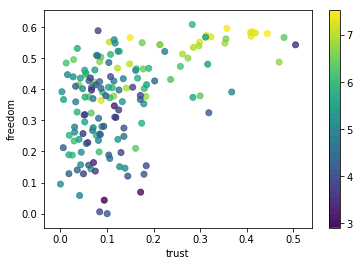

In [24]:
#plt.size(10,5)

plt.scatter(
    y=df2016['freedom'],
    x=df2016['trust'],
    alpha=0.8,
    c=df2016['happiness'],
)
plt.ylabel('freedom')
plt.xlabel('trust')
plt.colorbar()
plt.show()